## CNN for Frequency Estimation Problem

### Overview

Convolutional Neural Networks (CNNs) are widely used for various tasks such as image classification, object detection, and even time-series analysis. However, they can also be applied to frequency estimation problems, where the goal is to identify the dominant frequency components in a given signal. This application is particularly useful in areas like signal processing, audio analysis, and communications.

### Detailed Explanation

**1. Problem Definition:**

Frequency estimation involves determining the frequency components present in a signal. For instance, in audio signal processing, you might want to find the pitch of a musical note. Traditional methods for frequency estimation include Fourier Transform and its variants. However, CNNs offer a data-driven approach that can potentially provide more robust and accurate estimations, especially in the presence of noise.

**2. Why Use CNNs for Frequency Estimation?**

- **Feature Learning:** CNNs can automatically learn relevant features from raw data without manual feature extraction.
- **Robustness:** CNNs can handle noisy data better than some traditional methods.
- **Non-linearity:** CNNs can model complex, non-linear relationships that might exist in the data.

**3. Architecture Design:**

A typical CNN architecture for frequency estimation might include:

- **Input Layer:** Takes the raw signal or a spectrogram (a visual representation of the spectrum of frequencies).
- **Convolutional Layers:** Extracts local patterns from the input signal or spectrogram.
- **Pooling Layers:** Reduces dimensionality and helps in focusing on the most important features.
- **Fully Connected Layers:** Integrates the learned features to make a final prediction of the frequency components.
- **Output Layer:** Provides the estimated frequencies, often using regression to predict continuous values.

**4. Example Implementation in PyTorch:**

Here’s a simplified example to illustrate how you might implement a CNN for frequency estimation using PyTorch.

used loss: 

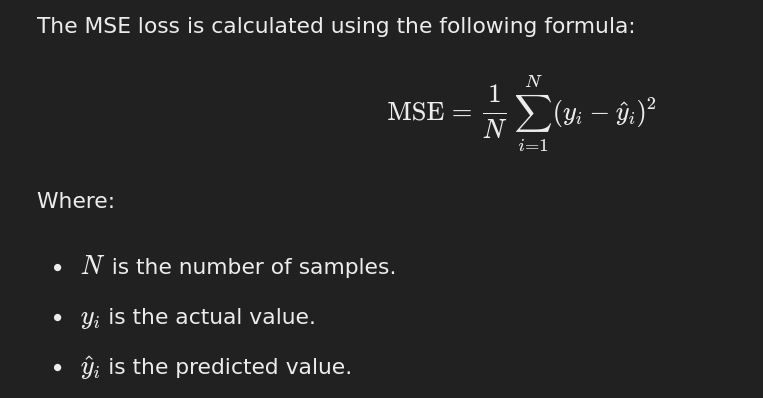

### Real-World Examples

1. **Music Analysis:** Estimating the pitch of musical notes in audio recordings.
2. **Biomedical Signal Processing:** Analyzing EEG or ECG signals to determine specific frequency components related to different physiological states.
3. **Communication Systems:** Identifying the carrier frequency of transmitted signals in wireless communication.

### Conclusion

Using CNNs for frequency estimation leverages the power of deep learning to handle complex and noisy signals. While traditional methods remain valuable, CNNs offer a complementary approach that can enhance accuracy and robustness in various applications.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

# Example signal generation function
def generate_signal(frequency, sampling_rate=1000, duration=1):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)
    return signal

class FrequencyEstimationCNN(nn.Module):
    def __init__(self):
        super(FrequencyEstimationCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 250, 128)  # Adjust based on input size
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 250)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Generating a sample signal
frequency = 5  # Frequency in Hz
signal = generate_signal(frequency)
signal = torch.tensor(signal, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Adding batch and channel dimensions

# Model instantiation
model = FrequencyEstimationCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (simplified)
for epoch in range(100):  # Example number of epochs
    optimizer.zero_grad()
    output = model(signal)
    loss = criterion(output, torch.tensor([frequency], dtype=torch.float32))
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

# Output the estimated frequency
with torch.no_grad():
    estimated_frequency = model(signal).item()
    print(f'Estimated Frequency: {estimated_frequency:.2f} Hz')

/data/solai/venvMamabaFixel/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 4.4269
Epoch [20/100], Loss: 1.2740
Epoch [30/100], Loss: 0.4017
Epoch [40/100], Loss: 0.1266
Epoch [50/100], Loss: 0.0434
Epoch [60/100], Loss: 0.0179
Epoch [70/100], Loss: 0.0072
Epoch [80/100], Loss: 0.0024
Epoch [90/100], Loss: 0.0004
Epoch [100/100], Loss: 0.0000
Estimated Frequency: 5.00 Hz
